In [2]:
%load_ext autoreload
%autoreload 2

import itertools
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
import time
from tqdm import tqdm

from graph_generation import GenerateGraph
from models import GCN
from train import Trainer, Dataset
from embedding import Embedding
from experiments import train_take_embedding, plot_dim1, plot_dimN, plot_correlation_error, get_metrics
from config_valid import Config, TrainingMode
from plot_model import plot_model
from utils import plot_wo_outliers

import torch
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

from scipy import stats

import yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

# Regressione

## Distribuzione discreta - ultimo layer Denso

In [18]:
config_file = "configurations/regression1.yml"
dataset, config_c = initialize_dataset(config_file)

Generating dataset...
Mean connectivity for each node: 14.923 p=0.05
Mean connectivity for each node: 89.754 p=0.3


In [19]:
embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset, type_embedding='graph')

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 8)
  )
  (lin): Linear(in_features=8, out_features=1, bias=True)
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
    (2): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|██████████████████████████████████████████████████████████████| 600/600 [00:42<00:00, 14.03it/s]


Tempo impiegato: 42.86941456794739
tensor([0.3020], device='cuda:0') 420
tensor([0.2982], device='cuda:0') 180
runs/lr-0.01_epochs1800_bs150_neurons-1-8-8-1_04Aug_13-15-50
Run training for 1800 epochs
Before training Test loss: 0.00021386645320389005
Epoch: 0	Test loss: 0.00017213820893731383
Epoch: 100	Test loss: 0.0001363965630945232
Epoch: 200	Test loss: 7.401706857813729e-05
Epoch: 300	Test loss: 3.9860249186555546e-05
Epoch: 400	Test loss: 4.797826986759901e-05
Epoch: 500	Test loss: 4.0540797635912894e-05
Epoch: 600	Test loss: 3.40774603601959e-05
Epoch: 700	Test loss: 2.759045326254434e-05
Epoch: 800	Test loss: 2.8671043562806313e-05
Epoch: 900	Test loss: 3.906554775312543e-05
Epoch: 1000	Test loss: 3.2420944060302444e-05
Epoch: 1100	Test loss: 2.736951509076688e-05
Epoch: 1200	Test loss: 3.2704200647357437e-05
Epoch: 1300	Test loss: 2.4747452698647976e-05
Epoch: 1400	Test loss: 1.772751371997098e-05
Epoch: 1500	Test loss: 2.3491238890629676e-05
Epoch: 1600	Test loss: 2.488612921

### Display the model

aten::new_zeros %index.13 : Long(45000, strides=[1], requires_grad=0, device=cuda:0) = aten::new_zeros(%519, %387, %388, %389, %390, %391) # /home/daniele/anaconda3/envs/pytorch-geom/lib/python3.8/site-packages/torch_geometric/nn/aggr/base.py:56:0



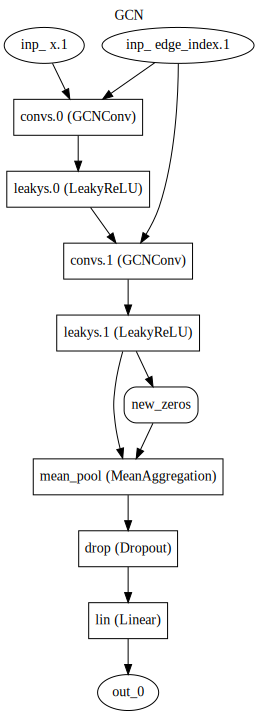

In [6]:
batch = trainer.dataset.sample_dummy_data()
d = plot_model(trainer.model, batch)
d

### Inspect Embedding feature arrays

In [20]:
embeddings = Embedding(embeddings_array, trainer.dataset, test_loss_list, config_c)

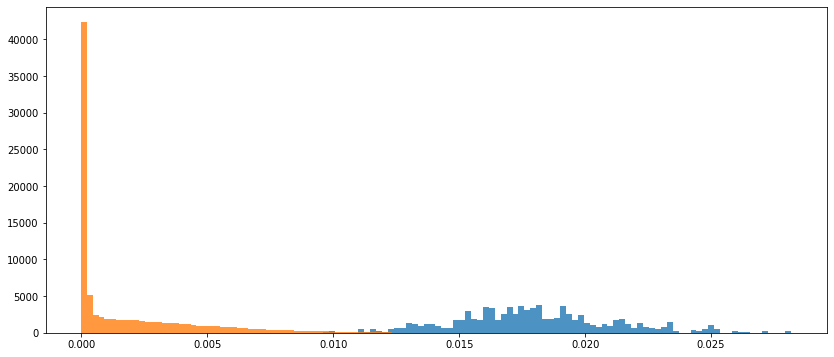

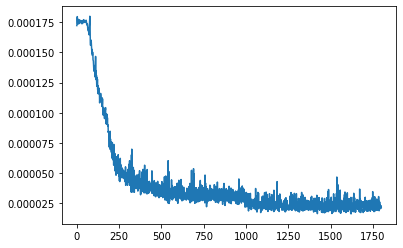

In [21]:
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(test_loss_list);

## Distribuzione discreta - senza ultimo layer Denso

In [13]:
config_file = "configurations/regression2.yml"
dataset, config_c = initialize_dataset(config_file)
embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset, type_embedding='graph')

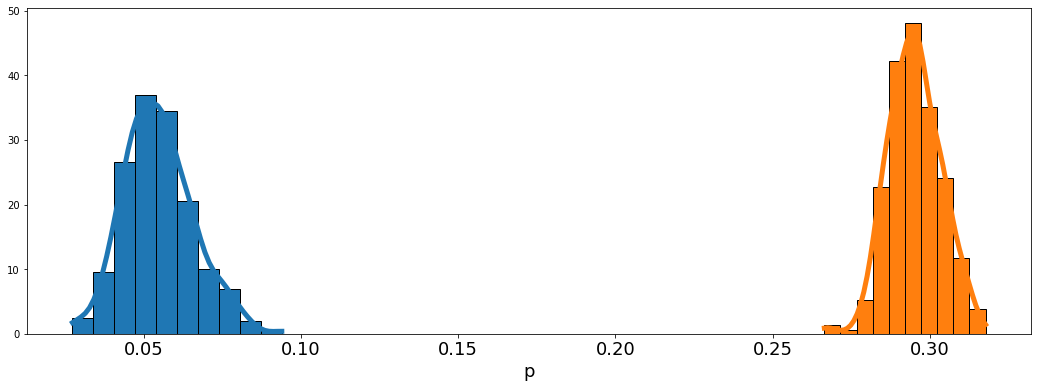

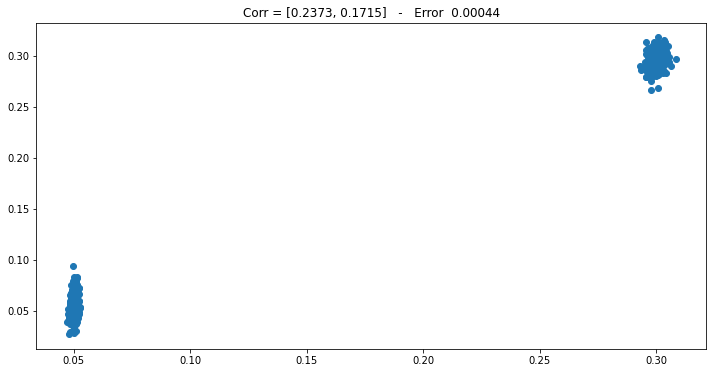

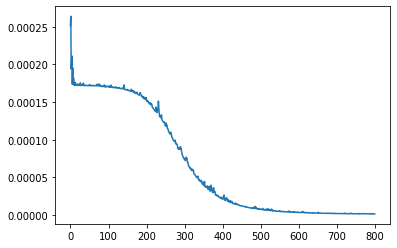

In [15]:
embeddings = Embedding(embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(test_loss_list);

In [ ]:
provare con più di due classi, far vedere che quando aggiungo le classi come vanno i picchi

## Distribuzione continua - ultimo layer Denso

In [29]:
config_file = "configurations/regression3.yml"
dataset, config_c = initialize_dataset(config_file)

Generating dataset...
Dataset generated


In [30]:
embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset, type_embedding='graph')

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 16)
    (1): GCNConv(16, 8)
  )
  (lin): Linear(in_features=8, out_features=1, bias=True)
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
    (2): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|████████████████████████████████████████████████████████████| 1000/1000 [02:06<00:00,  7.92it/s]


Tempo impiegato: 126.45102858543396
tensor([0.1292], device='cuda:0') 700
tensor([0.2165], device='cuda:0') 300
runs/lr-0.01_epochs8000_bs150_neurons-1-16-8-1_04Aug_13-55-47
Run training for 8000 epochs
Before training Test loss: 0.0036392011245091754
Epoch: 0	Test loss: 0.001661748637755712
Epoch: 100	Test loss: 0.00017089370638132095
Epoch: 200	Test loss: 0.0001709631582101186
Epoch: 300	Test loss: 0.00017090409994125367
Epoch: 400	Test loss: 0.000170857273042202
Epoch: 500	Test loss: 0.00017095836500326792
Epoch: 600	Test loss: 0.0001709594080845515
Epoch: 700	Test loss: 0.0001709339829782645
Epoch: 800	Test loss: 0.00017091457421580951
Epoch: 900	Test loss: 0.00017093848437070845
Epoch: 1000	Test loss: 0.00017104568580786388
Epoch: 1100	Test loss: 0.00017115475609898566
Epoch: 1200	Test loss: 0.00017092793559034665
Epoch: 1300	Test loss: 0.00017083444943030674
Epoch: 1400	Test loss: 0.0001343288707236449
Epoch: 1500	Test loss: 9.347592170039813e-05
Epoch: 1600	Test loss: 9.46654379

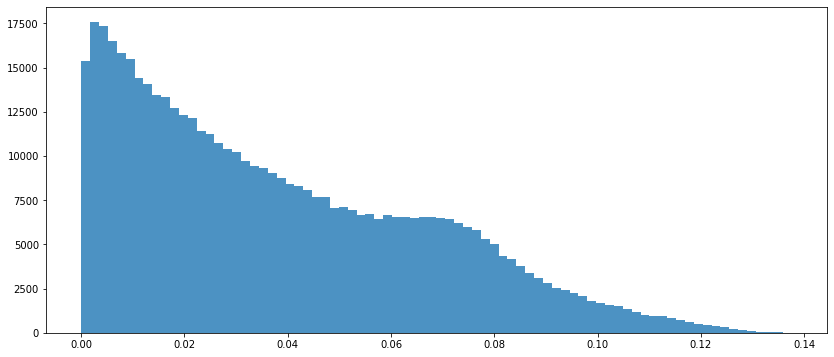

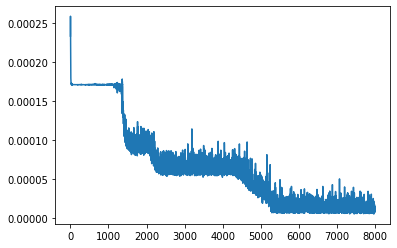

In [34]:
embeddings = Embedding(embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

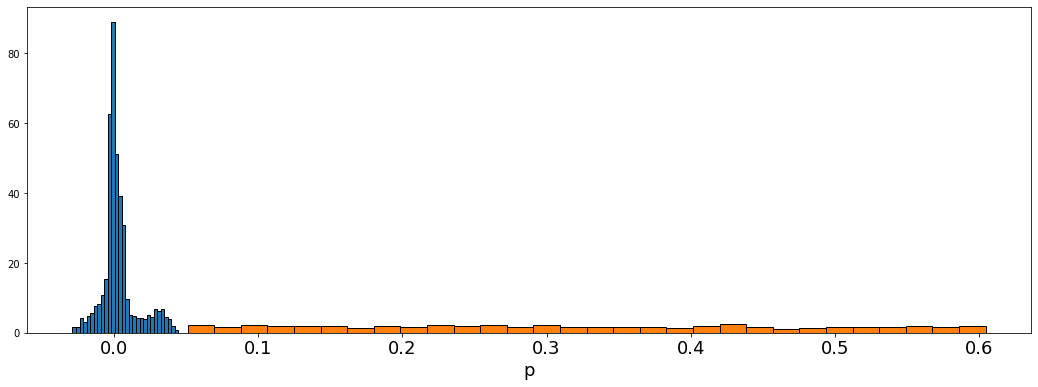

In [38]:
emb = embeddings.embeddings_array.flatten()
lab = embeddings.embedding_labels
plot_dim1([emb, lab], bins=30, want_kde=False)

## Distribuzione continua - senza ultimo layer Denso

In [41]:
config_file = "configurations/regression4.yml"
dataset, config_c = initialize_dataset(config_file)
embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset, type_embedding='graph')

Generating dataset...
Dataset generated
GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 1)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
    (2): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
MSELoss()
Loading Dataset...


100%|████████████████████████████████████████████████████████████| 1000/1000 [02:04<00:00,  8.05it/s]


Tempo impiegato: 124.47003650665283
tensor([0.2990], device='cuda:0') 700
tensor([0.1150], device='cuda:0') 300
runs/lr-0.01_epochs1800_bs150_neurons-1-8-1_04Aug_16-05-12
Run training for 1800 epochs
Before training Test loss: 0.000347683218618234
Epoch: 0	Test loss: 0.00019332964594165485
Epoch: 100	Test loss: 0.00016524074599146842
Epoch: 200	Test loss: 0.00016763563578327498
Epoch: 300	Test loss: 0.00016595124577482542
Epoch: 400	Test loss: 0.00016574574013551076
Epoch: 500	Test loss: 0.0001667156939705213
Epoch: 600	Test loss: 0.00016361928234497706
Epoch: 700	Test loss: 0.00015629385908444722
Epoch: 800	Test loss: 0.00012975774705410004
Epoch: 900	Test loss: 7.852389787634213e-05
Epoch: 1000	Test loss: 4.143741602698962e-05
Epoch: 1100	Test loss: 2.6454237134506304e-05
Epoch: 1200	Test loss: 1.584883158405622e-05
Epoch: 1300	Test loss: 1.1950004457806548e-05
Epoch: 1400	Test loss: 1.0323289316147566e-05
Epoch: 1500	Test loss: 1.1386849218979477e-05
Epoch: 1600	Test loss: 9.3168625

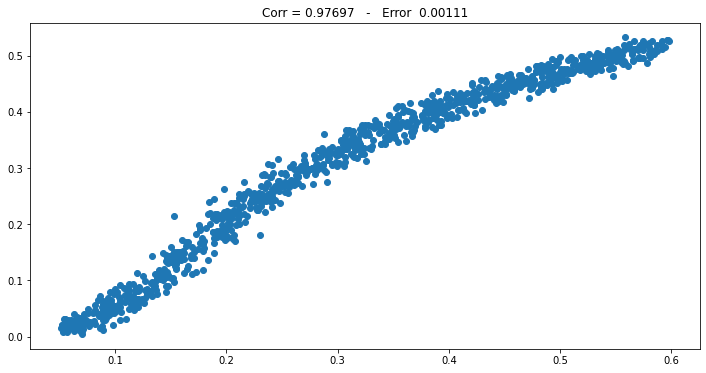

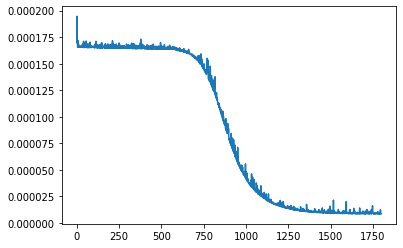

In [42]:
embeddings = Embedding(embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

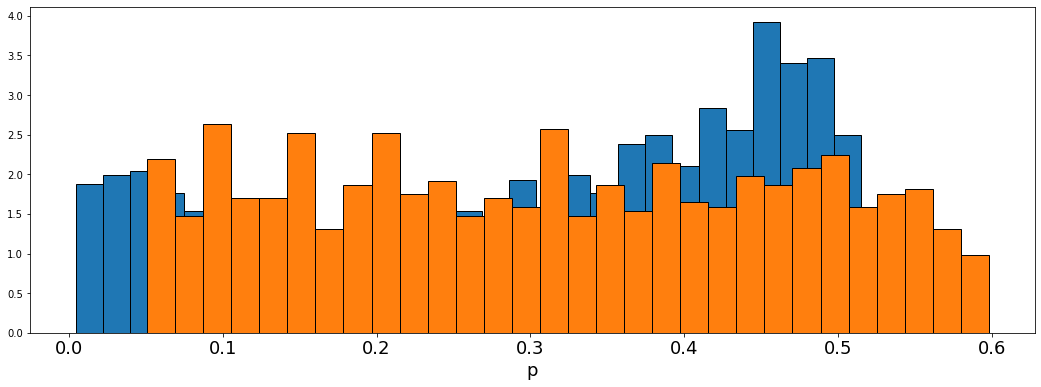

In [43]:
emb = embeddings.embeddings_array.flatten()
lab = embeddings.embedding_labels
plot_dim1([emb, lab], bins=30, want_kde=False)

# Classificazione

## ultimo layer Denso

In [51]:
config_file = "configurations/classification1.yml"
dataset, config_c = initialize_dataset(config_file)

Mean connectivity for each node: 14.954 p=0.05
Mean connectivity for each node: 89.712 p=0.3


In [53]:
embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset, type_embedding='graph')

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
  )
  (lin): Linear(in_features=8, out_features=2, bias=True)
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
    (2): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
CrossEntropyLoss()
Loading Dataset...


100%|██████████████████████████████████████████████████████████████| 600/600 [00:42<00:00, 14.07it/s]


Tempo impiegato: 42.727346658706665
tensor([[0., 1.]], device='cuda:0') 420
tensor([[0., 1.]], device='cuda:0') 180
runs/lr-0.01_epochs2500_bs150_neurons-1-8-2_04Aug_16-36-01
Run training for 2500 epochs
Before training Test loss: 0.0077118343777126735
Epoch: 0	Test loss: 0.007707163360383775
Epoch: 100	Test loss: 0.00769759217898051
Epoch: 200	Test loss: 0.006993607348865933
Epoch: 300	Test loss: 0.005876307355033027
Epoch: 400	Test loss: 0.004310909410317739
Epoch: 500	Test loss: 0.0032862375179926553
Epoch: 600	Test loss: 0.002516054030921724
Epoch: 700	Test loss: 0.0016489755776193406
Epoch: 800	Test loss: 0.0011178052673737207
Epoch: 900	Test loss: 0.0008642413136031893
Epoch: 1000	Test loss: 0.0006957219292720158
Epoch: 1100	Test loss: 0.0006298119409216775
Epoch: 1200	Test loss: 0.0005140267933408419
Epoch: 1300	Test loss: 0.0004262657008237309
Epoch: 1400	Test loss: 0.0003984480889307128
Epoch: 1500	Test loss: 0.0003676146475805177
Epoch: 1600	Test loss: 0.00029605599120259286


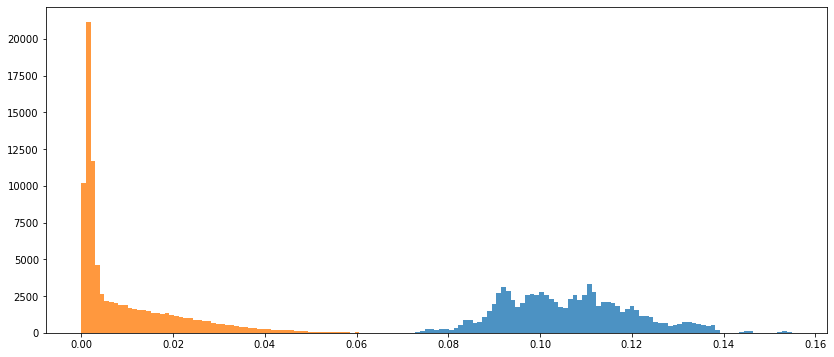

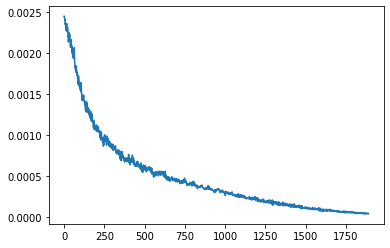

In [54]:
embeddings = Embedding(embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

## senza ultimo layer Denso

In [56]:
config_file = "configurations/classification2.yml"
dataset, config_c = initialize_dataset(config_file)

Mean connectivity for each node: 14.93 p=0.05
Mean connectivity for each node: 89.677 p=0.3


In [57]:
embeddings_array, model, test_loss_list, trainer = train_take_embedding(config_c, dataset, type_embedding='graph')

GCN(
  (convs): ModuleList(
    (0): GCNConv(1, 8)
    (1): GCNConv(8, 2)
  )
  (leakys): ModuleList(
    (0): LeakyReLU(negative_slope=0.03)
    (1): LeakyReLU(negative_slope=0.03)
    (2): LeakyReLU(negative_slope=0.03)
  )
  (mean_pool): MeanAggregation()
  (drop): Dropout(p=0.5, inplace=False)
)
CrossEntropyLoss()
Loading Dataset...


100%|██████████████████████████████████████████████████████████████| 600/600 [00:41<00:00, 14.44it/s]


Tempo impiegato: 41.65154671669006
tensor([[0., 1.]], device='cuda:0') 420
tensor([[1., 0.]], device='cuda:0') 180
runs/lr-0.01_epochs2500_bs150_neurons-1-8-2_04Aug_16-46-20
Run training for 2500 epochs
Before training Test loss: 0.007703003618452284
Epoch: 0	Test loss: 0.007728159096505907
Epoch: 100	Test loss: 0.007677388191223144
Epoch: 200	Test loss: 0.006355311142073737
Epoch: 300	Test loss: 0.004854994350009494
Epoch: 400	Test loss: 0.0034331737293137442
Epoch: 500	Test loss: 0.00243778419163492
Epoch: 600	Test loss: 0.001694712373945448
Epoch: 700	Test loss: 0.001210430223080847
Epoch: 800	Test loss: 0.0008736609584755367
Epoch: 900	Test loss: 0.0006493790282143487
Epoch: 1000	Test loss: 0.00048027533209986156
Epoch: 1100	Test loss: 0.0003660695834292306
Epoch: 1200	Test loss: 0.0002831936296489504
Epoch: 1300	Test loss: 0.00022066841936773724
Epoch: 1400	Test loss: 0.0001741635871844159
Epoch: 1500	Test loss: 0.00013853423814806672
Epoch: 1600	Test loss: 0.00011146031320095063


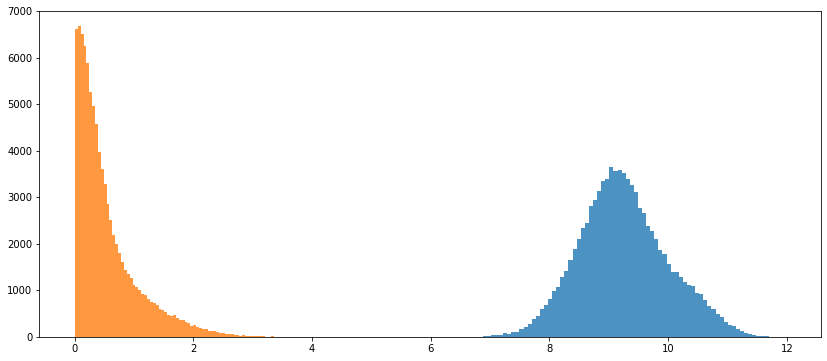

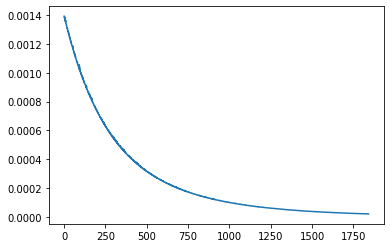

In [58]:
embeddings = Embedding(embeddings_array, trainer.dataset, test_loss_list, config_c)
num_emb_neurons = trainer.model.convs[-1].out_channels
get_metrics(embeddings, num_emb_neurons)
plt.plot(plot_wo_outliers(test_loss_list));

In [ ]:
anche questo con più classi

In [60]:
embeddings.embeddings_array.shape

(600, 2)

# Vedo cosa fa su altri grafi che non ha mai visto, con p diversa

In [ ]:
config['graph_dataset']['list_p'] = [0.03, 0.2]
dataset_grafi_nx, dataset_labels, list_p = dataset_nclass_ER(config)
trainer.load_dataset(dataset_grafi_nx, dataset_labels)
whole_data = trainer.dataset.dataset_pyg
all_data_loader = DataLoader(whole_data, batch_size=trainer.dataset.bs, shuffle=False) 
embeddings_array2 = trainer.take_embedding(all_data_loader)
embeddings_array2 = np.array([emb.cpu().detach().numpy() for emb in embeddings_array2])

embeddings2 = Embedding(embeddings_array2, trainer.dataset.dataset, trainer.dataset.labels, list_p)

In [ ]:
plt.figure(figsize=(18, 4))
h,e = np.histogram(embeddings2.embeddings_array.flatten(), bins=30, density=False)
x = np.linspace(e.min(), e.max())
plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

In [ ]:
actual_p2 = np.array([nx.to_numpy_matrix(t).sum(axis=1).mean() / (num_nodes-1) for t in trainer.dataset.dataset])
for p in list_p:
    mask_int = np.argwhere(intorno(p, embeddings2.embedding_labels, 0.15)).flatten()
    plt.scatter(actual_p2[mask_int], embeddings2.embeddings_array[mask_int].flatten()) #, s=area, c=colors, alpha=0.5)
    # correlazione tra target e prediction
    correlaz = np.corrcoef(embeddings2.embeddings_array[mask_int].flatten(), actual_p2[mask_int])[0,1]
    plt.title(f"P = {p}     corr = {correlaz}")
    plt.show()